✅ Data Loaded Successfully from local files!
Movies shape: (1682, 2)
Ratings shape: (100000, 4)

✅ Sample Merged Data:
   userId  movieId  rating                       title
0     196      242       3                Kolya (1996)
1     186      302       3    L.A. Confidential (1997)
2      22      377       1         Heavyweights (1994)
3     244       51       2  Legends of the Fall (1994)
4     166      346       1         Jackie Brown (1997)

✅ User–Movie Matrix Created
Matrix shape: (943, 1664)

🔍 Generating recommendations for: 'Toy Story (1995)' (Min 50 ratings)



/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                                             Correlation  Count
title                                                          
Raise the Red Lantern (1991)                    0.641535     58
Flubber (1997)                                  0.558389     53
Jackal, The (1997)                              0.557876     87
Craft, The (1996)                               0.549100    104
Island of Dr. Moreau, The (1996)                0.490491     57
Notorious (1946)                                0.486031     52
Cyrano de Bergerac (1990)                       0.480052     66
Beautician and the Beast, The (1997)            0.466064     86
Winnie the Pooh and the Blustery Day (1968)     0.463056     75
Down Periscope (1996)                           0.457995    101


/tmp/ipython-input-4062357958.py:104: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


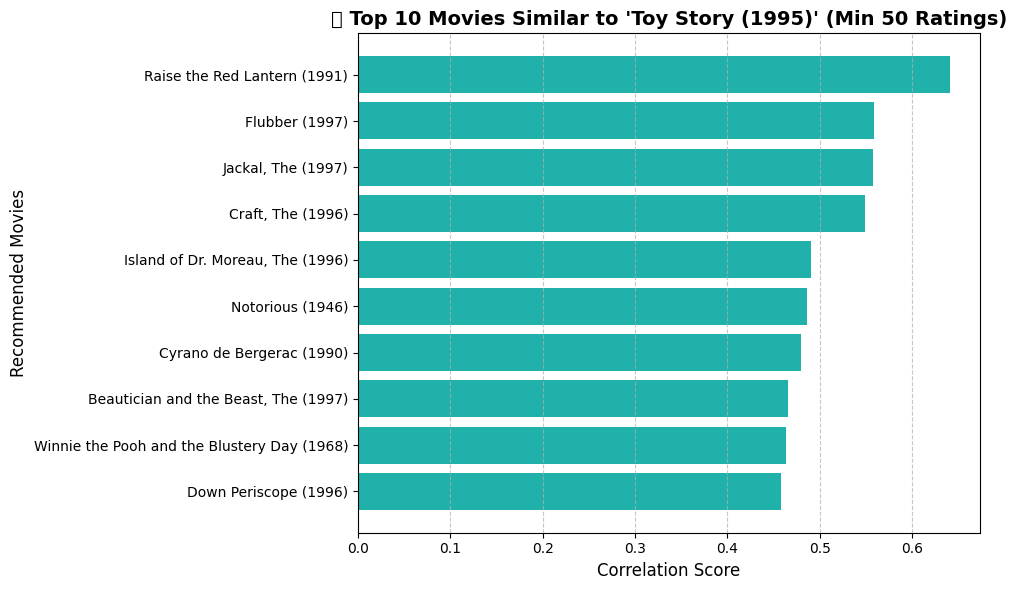


✅ Bar Chart Generated and Saved as 'toy_story_recommendations_barchart.png'

💾 Recommendations saved as 'recommendations.csv'

✅ Pipeline Execution Completed Successfully!


<Figure size 640x480 with 0 Axes>

In [ ]:
# ==========================================
# 🎥 MOVIE RECOMMENDATION DATA PIPELINE PROJECT (FINAL FIXED CODE)
# ==========================================

# 📦 STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 📥 STEP 2: Load Datasets (FIXED for MovieLens 100k Local Files)
# ==========================================
# IMPORTANT: This assumes 'u.item' and 'u.data' have been uploaded to the Colab session.

movies_file = "u.item"
ratings_file = "u.data"

# Define columns for the pipe-delimited movie file (u.item)
movie_cols = ['movieId', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Define columns for the tab-delimited rating file (u.data)
rating_cols = ['userId', 'movieId', 'rating', 'timestamp']

try:
    # Load movie data (pipe-delimited, no header, latin-1 encoding)
    movies = pd.read_csv(movies_file, sep='|', names=movie_cols, encoding='latin-1')

    # Load rating data (tab-delimited, no header)
    ratings = pd.read_csv(ratings_file, sep='\t', names=rating_cols)

    # Keep only necessary columns for the merge
    movies = movies[['movieId', 'title']]
    ratings = ratings[['userId', 'movieId', 'rating', 'timestamp']]

    print("✅ Data Loaded Successfully from local files!")
    print("Movies shape:", movies.shape)
    print("Ratings shape:", ratings.shape)

    # ==========================================
    # 🧹 STEP 3: Merge and Preprocess
    # ==========================================
    movie_data = pd.merge(ratings, movies, on='movieId')
    # Drop the 'timestamp' column as it's not needed for the recommendation logic
    movie_data.drop('timestamp', axis=1, inplace=True)
    print("\n✅ Sample Merged Data:")
    print(movie_data.head())

    # ==========================================
    # 🧩 STEP 4: Create User–Movie Rating Matrix
    # ==========================================
    user_movie_matrix = movie_data.pivot_table(index='userId', columns='title', values='rating')
    print("\n✅ User–Movie Matrix Created")
    print("Matrix shape:", user_movie_matrix.shape)

    # ==========================================
    # 🎯 STEP 5: Recommendation Function
    # ==========================================
    def recommend_movies(movie_name, min_ratings=50):
        """Generates movie recommendations using Pearson Correlation."""

        if movie_name not in user_movie_matrix.columns:
            print(f"❌ Movie '{movie_name}' not found in dataset. Check the exact title and year.")
            return None

        # Calculate correlation of the target movie with all other movies
        movie_ratings = user_movie_matrix[movie_name]
        similar_to_movie = user_movie_matrix.corrwith(movie_ratings)

        # Convert to DataFrame, drop NaNs (movies with no common users), and join rating count
        corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
        corr_movie.dropna(inplace=True)

        ratings_count = movie_data.groupby('title')['rating'].count()
        corr_movie = corr_movie.join(ratings_count)
        corr_movie.rename(columns={'rating': 'Count'}, inplace=True)

        # Filter by minimum rating count, exclude the input movie, and sort by correlation
        recommendations = corr_movie[
            (corr_movie['Count'] >= min_ratings) & (corr_movie.index != movie_name)
        ].sort_values('Correlation', ascending=False)

        return recommendations.head(10)

    # ==========================================
    # 🧠 STEP 6: Example Recommendation
    # ==========================================
    movie_name = "Toy Story (1995)"
    min_ratings = 50
    print(f"\n🔍 Generating recommendations for: '{movie_name}' (Min {min_ratings} ratings)\n")

    recommendations = recommend_movies(movie_name, min_ratings=min_ratings)
    print(recommendations)

    # ==========================================
    # 📊 STEP 7: Visualization (Bar Chart)
    # ==========================================
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10,6))
        # Plot in reverse order for highest correlation on top
        plt.barh(recommendations.index[::-1], recommendations["Correlation"][::-1], color="lightseagreen")
        plt.xlabel("Correlation Score", fontsize=12)
        plt.ylabel("Recommended Movies", fontsize=12)
        plt.title(f"🎬 Top 10 Movies Similar to '{movie_name}' (Min {min_ratings} Ratings)", fontsize=14, fontweight='bold')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show() # Display the chart

        # Save the chart to the Colab session
        plt.savefig("toy_story_recommendations_barchart.png")
        print("\n✅ Bar Chart Generated and Saved as 'toy_story_recommendations_barchart.png'")
    else:
        print("⚠️ No recommendations to visualize.")

    # ==========================================
    # 💾 STEP 8: Save Recommendations
    # ==========================================
    if recommendations is not None:
        recommendations.to_csv("recommendations.csv", index=True)
        print("\n💾 Recommendations saved as 'recommendations.csv'")

    print("\n✅ Pipeline Execution Completed Successfully!")

except FileNotFoundError:
    print("\n❌ Error: Dataset files not found.")
    print("Please ensure you have uploaded 'u.item' and 'u.data' to your Google Colab session.")
except Exception as e:
    print(f"\n❌ Pipeline failed during execution. Error: {e}")

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k/u.item
!wget http://files.grouplens.org/datasets/movielens/ml-100k/u.data

--2025-10-24 15:15:39--  http://files.grouplens.org/datasets/movielens/ml-100k/u.item
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.grouplens.org/datasets/movielens/ml-100k/u.item [following]
--2025-10-24 15:15:39--  https://files.grouplens.org/datasets/movielens/ml-100k/u.item
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236344 (231K)
Saving to: ‘u.item’

u.item              100%[===================>] 230.80K  1.28MB/s    in 0.2s    

2025-10-24 15:15:39 (1.28 MB/s) - ‘u.item’ saved [236344/236344]

--2025-10-24 15:15:39--  http://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (file